## Update content of the Atlas - generate maps based on the netcdf data
**Function**      : Plot (prec) maps in a uniform way based on the netcdf files<br>
**Author          : Team BETA**<br>
**First Built**   : 2021.07.28<br>
**Last Update     : 2021.08.09**<br>
**Library**       : os, numpy, netcdf4, matplotlib, cartopy<br>
**Description**   : In this notebook serves to extract netcdf data and generate maps for Atlas page.<br>
**Return Values   : png files**<br>
**Note**          : All the maps are generated in a uniform way.<br>

In [1]:
import os
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Path
Specify the path to the dataset and the place to save the outputs. <br>

In [2]:
# please specify data path
datapath = '/mnt/d/NLeSC/BETA/EUCP/Atlas'
# please specify output path
output_path = '../assets/sample_figures/test'
os.makedirs(output_path, exist_ok = True)

### Extract data
Extract weather/climate data from given netCDF files.

In [3]:
# load dataset
dataset_eur_pr_41_60_vs_95_14_jja_cmip5_10prec = Dataset(os.path.join(datapath,'Rita_Lukas_Atlas',
                                                         'eur_CMIP5_pr_2041-2060_vs_1995-2014_10_JJA.nc'))

In [4]:
# extract data
eur_pr_41_60_vs_95_14_jja_cmip5_10prec = dataset_eur_pr_41_60_vs_95_14_jja_cmip5_10prec.variables['pr_weighted'][:]
lat_eur_pr_41_60_vs_95_14_jja_cmip5_10prec = dataset_eur_pr_41_60_vs_95_14_jja_cmip5_10prec.variables['lat'][:]
lon_eur_pr_41_60_vs_95_14_jja_cmip5_10prec = dataset_eur_pr_41_60_vs_95_14_jja_cmip5_10prec.variables['lon'][:]

In [5]:
# choose color map
cmap_prec = "BrBG"
cmap_tas = "coolwarm"
# label color bar
#label = [-200, -100, 0 , 100, 200]
#ticks = [-200, -100, 0 , 100, 200]

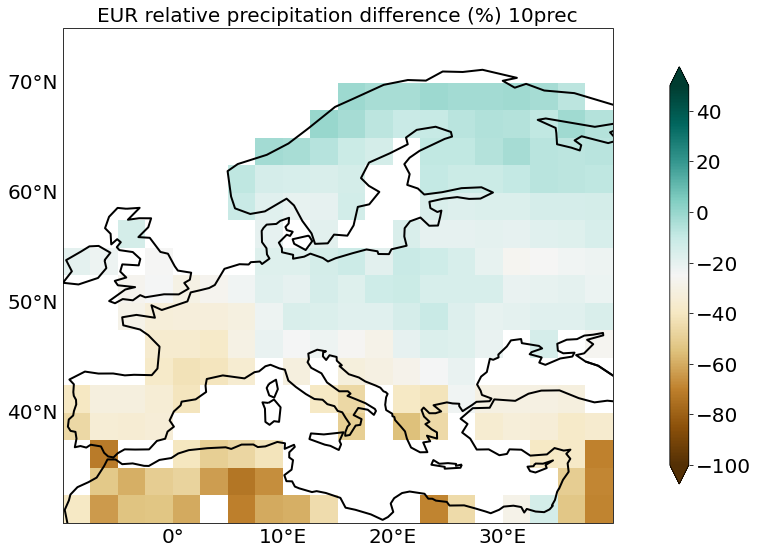

In [7]:
# plot figure
# more options about plotting with cartopy can be found via
# https://github.com/geek-yang/Energy-Wizard/blob/master/Postprocessing/visualization_gallery.py

fig = plt.figure(figsize=(12.8,9.6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10,40,30,75],ccrs.PlateCarree()) # East, West, South, Nouth
ax.coastlines(resolution='110m', color='black', linewidth=2)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# specify the location of labels
#gl.xlocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40])
#gl.ylocator = mticker.FixedLocator([30, 40, 50, 60, 70])
# specify label styles
gl.xlabel_style = {'size': 20, 'color': 'black'}
gl.ylabel_style = {'size': 20, 'color': 'black'}
cs = plt.pcolormesh(lon_eur_pr_41_60_vs_95_14_jja_cmip5_10prec,
                    lat_eur_pr_41_60_vs_95_14_jja_cmip5_10prec,
                    eur_pr_41_60_vs_95_14_jja_cmip5_10prec,
                    cmap=cmap_prec,
                    vmin=-100, vmax=50)
cbar = fig.colorbar(cs, extend='both', orientation='vertical',
                    shrink =0.8, pad=0.08, spacing="uniform")#, format="%.1f")
#cbar.set_label(label,size = 9)
#cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize = 20)
ax.set_title('EUR relative precipitation difference (%) 10prec', fontsize=20)
#plt.tight_layout()
plt.show()
fig.savefig(os.path.join(output_path,"test_prec.png"),dpi=150)